In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
# Read file

data = pd.read_csv('C:/Users/RW565TZ/Week2/diabetic_data.csv')

In [3]:
data.shape

(101766, 50)

In [4]:
data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
# Checking for missing values in dataset
# In the dataset missing values are represented as '?' sign

for col in data.columns:
    if data[col].dtype == object:
        print(col,data[col][data[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [8]:
######### Performing Feature Analysis ###############

In [9]:
## Removing data where 11,13,14,19,20,21 suggest expired patients in the hospital

data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [10]:
data['patients_count'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

In [11]:
data['readmitted'].value_counts()

NO     52527
>30    35502
<30    11314
Name: readmitted, dtype: int64

In [12]:
data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

In [13]:
####################################################

In [14]:
# Replacing data of null

data['race'] = data['race'].replace('?', 'Caucasian')

In [15]:
data.value_counts('race')

race
Caucasian          76454
AfricanAmerican    18772
Hispanic            2017
Other               1472
Asian                628
dtype: int64

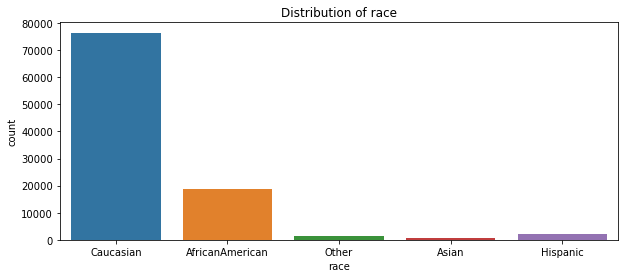

In [16]:
# Countplot for race 

plt.figure(figsize=(10,4))
sns.countplot(data=data,x='race')
plt.title('Distribution of race')
plt.show()

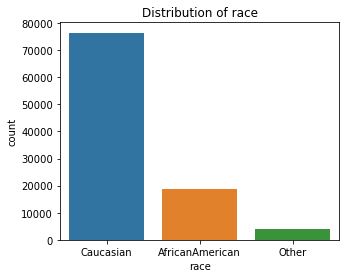

Caucasian          76454
AfricanAmerican    18772
Other               4117
Name: race, dtype: int64

In [17]:
# Map all other as Others

map_data = {'Asian':'Other','Hispanic':'Other'}
data['race']=data['race'].replace(map_data)

plt.figure(figsize=(5,4))
sns.countplot(data=data,x='race')
plt.title('Distribution of race')
plt.show()

data.race.value_counts()

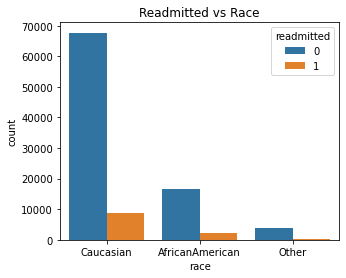

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='race',hue='readmitted')
plt.title('Readmitted vs Race')
plt.show()

In [19]:
####################################################

In [20]:
data.value_counts('gender')

gender
Female             53454
Male               45886
Unknown/Invalid        3
dtype: int64

In [21]:
# Drop Unknown/Invalid

data = data.drop(data.loc[data['gender']=='Unknown/Invalid'].index,axis=0)

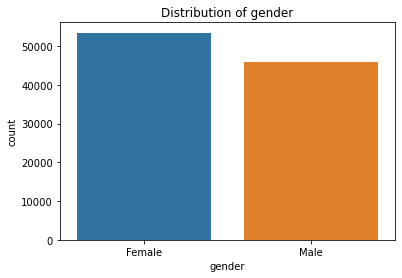

In [22]:
# Countplot for gender

sns.countplot(data=data,x='gender')
plt.title('Distribution of gender')
plt.show()

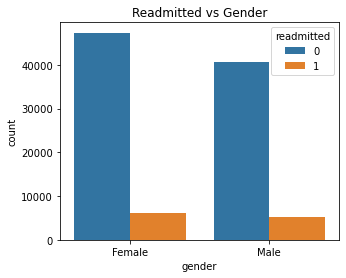

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='gender',hue='readmitted')
plt.title('Readmitted vs Gender')
plt.show()

In [24]:
####################################################

In [25]:
data['age']= data['age'].replace({'[0-10)':1,'[10-20)':2,'[20-30)':3,'[30-40)':4,'[40-50)':5,'[50-60)':6,'[60-70)':7,'[70-80)':8,'[80-90)':9,'[90-100)':10})

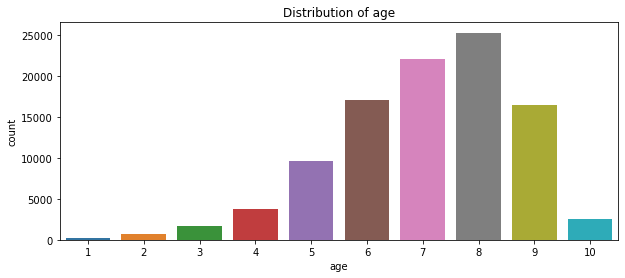

In [26]:
# Countplot for age 
data.value_counts('age')

plt.figure(figsize=(10,4))
plt.title('Distribution of age')
sns.countplot(data=data,x='age')
plt.show()

In [27]:
# Dropping columns with large number of missing values

data = data.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [28]:
####################################################

In [29]:
# Discharge disposition variable

data['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5,  7, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9,
       15, 24, 28, 27], dtype=int64)

In [30]:
mapped = {1:'Discharged to Home',6:'Discharged to Home',2:'Other',3:'Other',4:'Other',5:'Other',7:'Other',8:'Reserved',9:'Other',10:'Reserved',12:'Reserved',15:'Reserved',16:'Reserved',17:'Reserved',18:'Reserved',22:'Reserved',23:'Reserved',24:'Reserved',25:'Reserved',27:'Reserved',28:'Reserved'}

data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(mapped)

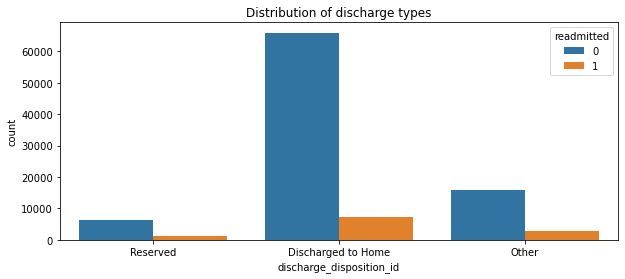

In [31]:
# Countplot for discharge_disposition_id

data.value_counts('discharge_disposition_id')

plt.figure(figsize=(10,4))
plt.title('Distribution of discharge types')
sns.countplot(data=data,x='discharge_disposition_id',hue='readmitted')
plt.show()

In [32]:
####################################################

In [33]:
data.value_counts('admission_source_id')

admission_source_id
7     55848
1     29167
17     6570
4      3118
6      2239
2      1081
5       806
3       185
20      159
9       125
8        15
22       12
10        8
11        2
14        2
25        2
13        1
dtype: int64

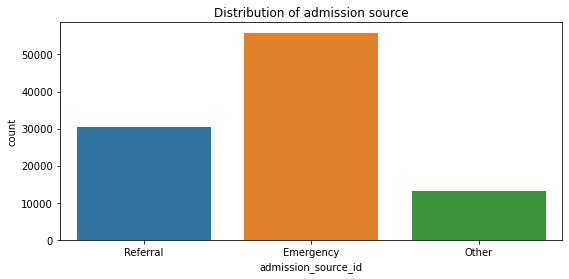

In [34]:
mapped = {1:'Referral',2:'Referral',3:'Referral',4:'Other',5:'Other',6:'Other',10:'Other',8:'Other',9:'Other',7:'Emergency',17:'Other',22:'Other',20:'Other',14:'Other',11:'Other',25:'Other',13:'Other'}
data['admission_source_id'] = data['admission_source_id'].replace(mapped)

plt.figure(figsize=(9,4))
sns.countplot(data=data,x='admission_source_id')
plt.title('Distribution of admission source')
plt.show()

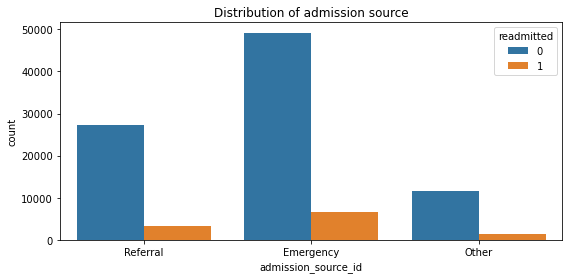

In [35]:
plt.figure(figsize=(9,4))
sns.countplot(data=data,x='admission_source_id',hue='readmitted')
plt.title('Distribution of admission source')
plt.show()

In [36]:
#######################################

In [37]:
data.value_counts('time_in_hospital')

time_in_hospital
3     17432
2     16891
1     13822
4     13684
5      9749
6      7355
7      5696
8      4270
9      2879
10     2262
11     1770
12     1383
13     1152
14      995
dtype: int64

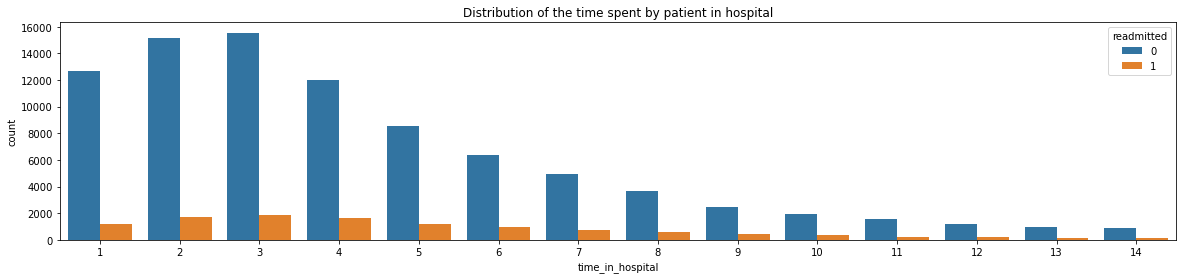

In [38]:
plt.figure(figsize=(20,4))
sns.countplot(data=data,x='time_in_hospital',hue='readmitted')
plt.title('Distribution of the time spent by patient in hospital')
plt.show()

In [39]:
#######################################

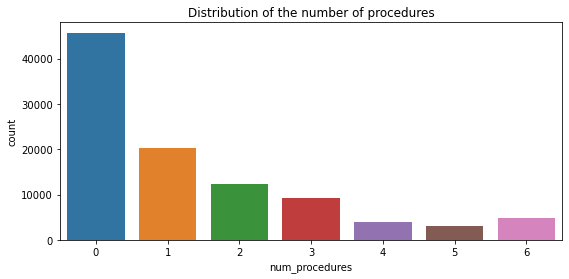

In [40]:
## Plot showing the number of procedures 

plt.figure(figsize=(9,4))
sns.countplot(data=data,x='num_procedures')
plt.title('Distribution of the number of procedures')
plt.show()

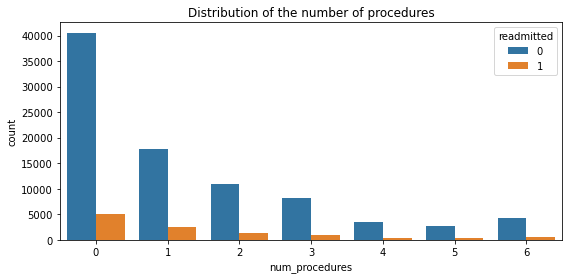

In [41]:
plt.figure(figsize=(9,4))
sns.countplot(data=data,x='num_procedures',hue='readmitted')
plt.title('Distribution of the number of procedures')
plt.show()

In [42]:
#######################################

In [43]:
data.value_counts('num_medications')

num_medications
13    5976
12    5888
11    5696
15    5694
14    5592
      ... 
70       2
75       2
74       1
79       1
81       1
Length: 75, dtype: int64

In [44]:
#######################################

In [45]:
data=data.replace('?',np.nan)

In [46]:
d_list = ['diag_1','diag_2','diag_3']

for col in d_list:
    data[col].fillna('NaN',inplace=True)

In [47]:
import re
def TransformFn(value):
    value=re.sub('V[0-9]*',"0",value)
    value=re.sub('E[0-9]*',"0",value)
    value=re.sub('NaN',"-1",value)
    return value

def TransformCategory(value):
    if value>=390 and value<=459 or value==785:
        category='Circulatory'
    elif value>=460 and value<=519 or value==786:
        category='Respiratory'
    elif value>=520 and value<=579 or value==787:
        category='Digestive'
    elif value>=250 and value<=251:
        category='Diabetes'
    elif value>=800 and value<=999:
        category='Injury'
    elif value>=710 and value<=739:
        category='Musculoskeletal'
    elif value>=580 and value<=629 or value==788:
        category='Neoplasms'
    elif value==-1:
        category='NAN'
    else:
        category='Other'
        
    return category    

In [48]:
for col in d_list:
    data[col]=data[col].apply(TransformFn)
    data[col]=data[col].astype(float)

In [49]:
for col in d_list:
    data[col] = data[col].apply(TransformCategory)

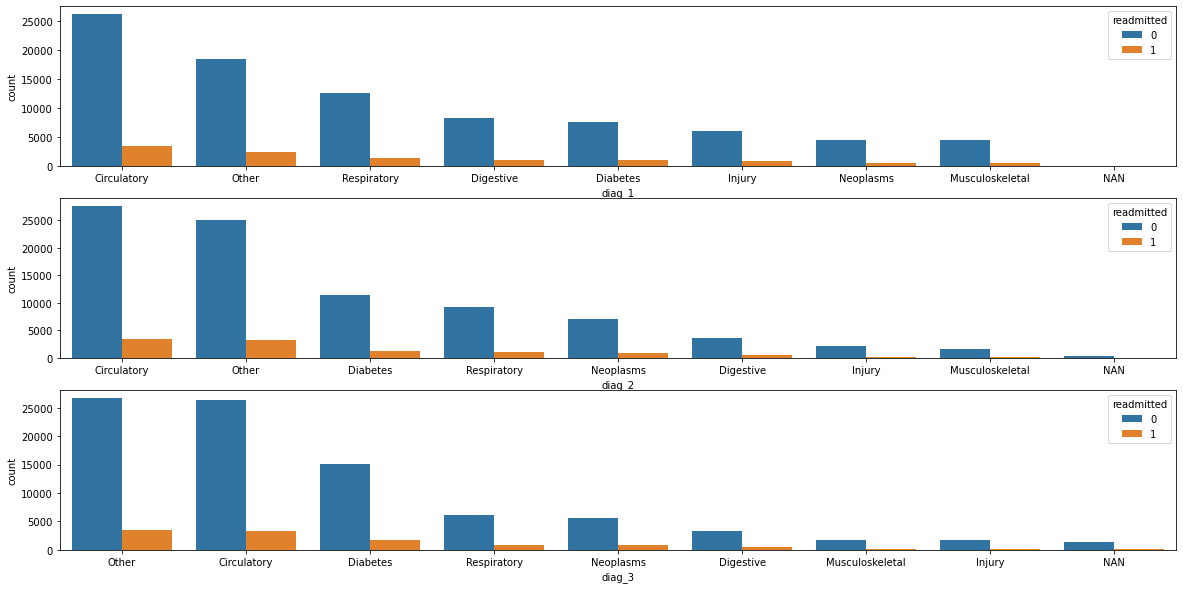

In [50]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(20,10))
count=0
for i in d_list:
    sns.countplot(data[i],hue=data.readmitted,ax=ax[count],order=data[i].value_counts().index)
    count=count+1

In [51]:
#######################################

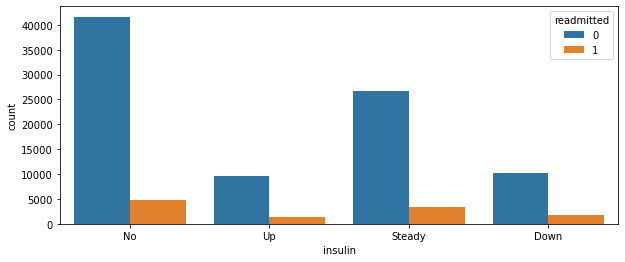

In [52]:
# Variable insulin 

fig,ax = plt.subplots(figsize=(10,4))
sns.countplot(x='insulin',hue='readmitted',data=data)
plt.show()

In [53]:
# Variable change 

data.value_counts('change')

change
No    53220
Ch    46120
dtype: int64

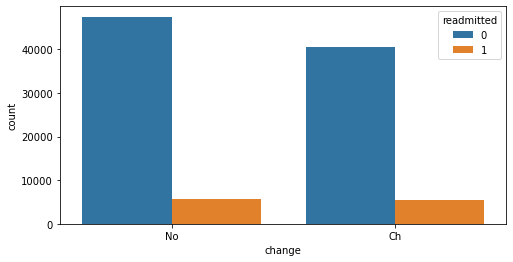

In [54]:
fig,ax = plt.subplots(figsize=(8,4))
sns.countplot(x='change',hue='readmitted',data=data)
plt.show()

max_glu_serum
0    94188
2     2607
1     2545
dtype: int64

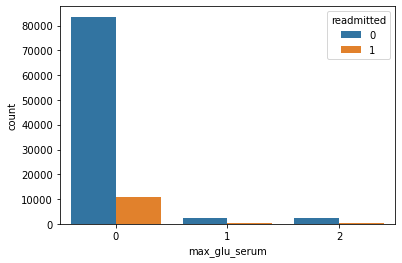

In [55]:
# Glucose Serum Test Result

data['max_glu_serum'] = data['max_glu_serum'].replace({'>200':2,'>300':2,'Norm':1,'None':0})
sns.countplot(x='max_glu_serum',hue='readmitted',data=data)

data.value_counts('max_glu_serum')

A1Cresult
0    82506
2    11912
1     4922
dtype: int64

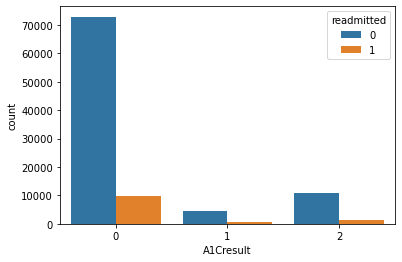

In [56]:
# A1c test result

data['A1Cresult']=data['A1Cresult'].replace({'>7':2,'>8':2,'Norm':1,'None':0})
sns.countplot(x='A1Cresult',hue='readmitted',data=data)

data.value_counts('A1Cresult')

diabetesMed
Yes    76717
No     22623
dtype: int64

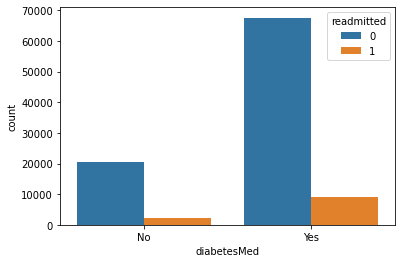

In [57]:
# Diabetes medication yes or no

sns.countplot(x='diabetesMed',hue='readmitted',data=data)
data.value_counts('diabetesMed')

In [58]:
data.corr()['readmitted']

encounter_id         -0.007989
patient_nbr           0.008772
age                   0.022200
admission_type_id    -0.013221
time_in_hospital      0.046883
num_lab_procedures    0.024040
num_procedures       -0.010832
num_medications       0.041180
number_outpatient     0.019166
number_emergency      0.060883
number_inpatient      0.168322
number_diagnoses      0.053573
max_glu_serum         0.012242
A1Cresult            -0.019415
readmitted            1.000000
patients_count        0.127930
Name: readmitted, dtype: float64

In [59]:
# Apply Label Encoding

label_encoder = LabelEncoder()

data['race'] = label_encoder.fit_transform(data['race'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['admission_type_id'] = label_encoder.fit_transform(data['admission_type_id'])
data['admission_source_id'] = label_encoder.fit_transform(data['admission_source_id'])
data['discharge_disposition_id'] = label_encoder.fit_transform(data['discharge_disposition_id'])
data['race'] = label_encoder.fit_transform(data['race'])
data['change'] = label_encoder.fit_transform(data['change'])
data['diabetesMed'] = label_encoder.fit_transform(data['diabetesMed'])

data['diag_1'] = label_encoder.fit_transform(data['diag_1'])
data['diag_2'] = label_encoder.fit_transform(data['diag_2'])
data['diag_3'] = label_encoder.fit_transform(data['diag_3'])

data['max_glu_serum'] = label_encoder.fit_transform(data['max_glu_serum'])
data['A1Cresult'] = label_encoder.fit_transform(data['A1Cresult'])
data['insulin'] = label_encoder.fit_transform(data['insulin'])

data = data.drop(['encounter_id','patient_nbr','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glyburide','glipizide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'], axis = 1)

In [60]:
# After feature analysis and EDA

data.shape

(99340, 24)

In [61]:
# Split into train and test data

X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [62]:
X_train.shape

(69538, 23)

In [63]:
X_test.shape

(29802, 23)

In [64]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patients_count
0,1,0,1,5,2,2,1,41,0,1,...,5,5,1,0,0,1,1,0,0,0
1,1,0,2,0,0,0,3,59,0,18,...,1,7,9,0,0,3,0,1,0,0
2,0,0,3,0,0,0,2,11,5,13,...,1,7,6,0,0,1,1,1,0,3
3,1,1,4,0,0,0,2,44,1,16,...,1,0,7,0,0,3,0,1,0,0
4,1,1,5,0,0,0,1,51,0,8,...,7,1,5,0,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,8,0,1,0,3,51,0,16,...,7,0,9,0,2,0,0,1,0,0
101762,0,0,9,0,1,1,5,33,3,18,...,7,2,9,0,0,2,1,1,0,1
101763,1,1,8,0,0,0,1,53,0,9,...,6,7,13,0,0,0,0,1,0,1
101764,1,0,9,1,1,0,10,45,2,21,...,7,3,9,0,0,3,0,1,0,1


In [65]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [76]:
# Using Random forest classifier

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, max_depth=12,n_jobs=-1)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
    
print('\n***Showing results for Random Forest***')
    
# Calculating the accuracies
print("\nTraining Accuracy :",classifier.score(X_train,y_train)*100)
print("\nTesting Accuracy :",classifier.score(X_test,y_test)*100)


***Showing results for Random Forest***

Training Accuracy : 97.58549282406742

Testing Accuracy : 92.65821085833166


In [77]:
# Making confusion matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[16446     0     0 ...     0     0     0]
 [    0  5875     0 ...     0     0     0]
 [    0     0  2854 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [78]:
print('Accuracy: {}'.format(accuracy_score(y_test,y_pred)))
print('Error Rate: {}'.format(1-accuracy_score(y_test,y_pred)))

Accuracy: 0.9265821085833166
Error Rate: 0.07341789141668342
